# Quantum Circuit Challenge 2025 : Task 1

Welcome to the **Quantum Circuit Challenge 2025!** 🌟 We are thrilled to have you embark on this journey to explore the fascinating world of quantum computing. Your first task is designed to ease you into the challenge while offering a glimpse into the quantum magic of correlation and control. Let’s dive in and unravel the mysteries of quantum gates and entanglement!

In a distant quantum realm, there exists a pair of particles, Alice and Bob, intricately linked through the enigmatic phenomenon of quantum correlation. These particles are not just neighbors—they share an unseen connection that defies classical intuition. When Alice's state is observed, Bob’s state seems to “know,” no matter how far apart they are.

The **Quantum Council** of the realm, fascinated by this bond, has tasked you, a rising quantum scientist, to demonstrate this correlation in action. They provide you with a *controlled-X (CNOT)* gate, a powerful tool in the quantum world. Your task is to create a circuit where Alice and Bob's connection is brought to life. **But beware**—the council values elegance and simplicity, so a well-documented, neatly crafted circuit is key to earning their favor.

Before starting the challenge install the required packages

In [ ]:
%pip install qiskit[visualization]==1.0.2
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install qiskit-transpiler-service
%pip install numpy

  Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.6 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.3.2
    Uninstalling qiskit-1.3.2:
      Successfully uninstalled qiskit-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-ibm-runtime 0.34.0 requires qiskit>=1.1.0, but you have qiskit 1.0.2 which is incompatible.
qiskit-aer 0.16.0 requires qiskit>=1.1.0, but you have qiskit 1.0.2 which is incompatible.


  Using cached qiskit-1.3.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-1.3.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.0.2
    Uninstalling qiskit-1.0.2:
      Successfully uninstalled qiskit-1.0.2


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [ ]:
# imports
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

## Import any other required packages

## Sub-Task 0

### Your Challenge:
**[5 Points]**


Using Qiskit or any other quantum SDK, construct a quantum circuit that demonstrates the concept of quantum correlation using a controlled gate. Here's what you need to do:

**Start with a Bell State:**

Create a circuit with two qubits representing Alice and Bob.

*   Use a Hadamard gate on Alice's qubit to create a superposition.
*   Apply a CNOT gate with Alice's qubit as the control and Bob's as the target to entangle them.

**Introduce a Measurement:**



*   Measure both qubits to observe the correlation between Alice and Bob.
*   Simulate the circuit multiple times to confirm the results.






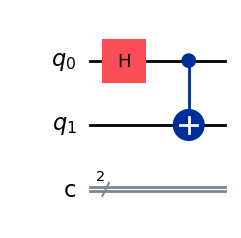

In [ ]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2,2)

# Add a Hadamard gate to qubit 0

  # Enter your code here
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0


  # Enter your code here
qc.cx(0,1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

In [ ]:
from qiskit import *

In [ ]:
# Write the code for measurement
qc.measure([0, 1],[0,1])
# Simulate the circuit

backend = AerSimulator()
job = backend.run(qc)
result = job.result()
counts = result.get_counts()
print(counts)


{'11': 513, '00': 511}


##  Sub-Task 1

**Congratulations on reaching the second milestone in this challenge!** 🌌 Now, we embark on a mission that blends quantum physics, problem-solving, and a bit of storytelling magic. Your task involves understanding and implementing *quantum teleportation*, one of the most iconic phenomena in quantum computing. This is where you become the courier of information, mastering entanglement to transmit quantum states flawlessly. Let's dive in!

In a distant future, humanity has colonized planets in far-flung galaxies, where classical communication lags have rendered instant messaging obsolete. Enter **Q-Couriers**, a secret society of quantum messengers who use entanglement to teleport quantum states between locations at the speed of thought.

A critical mission has arisen: a rogue agent has intercepted an important quantum state from the **Quantum Council of Andromeda** and tampered with its fidelity during a teleportation attempt. To recover and verify this state, you must rebuild the teleportation protocol while overcoming the rogue agent's sabotage.

###The Challenge:
Recreate the quantum teleportation protocol using Qiskit (or any quantum SDK), ensuring the following:

**Part 1: Setting Up Entanglement [15 points]**

1. Begin with three qubits:
  *   qₐ : Sender's qubit (initial state to teleport).
  *   qᵦ : An auxiliary qubit.
  *   qᵧ : Receiver's qubit.

2. Entangle qᵦ and qᵧ.

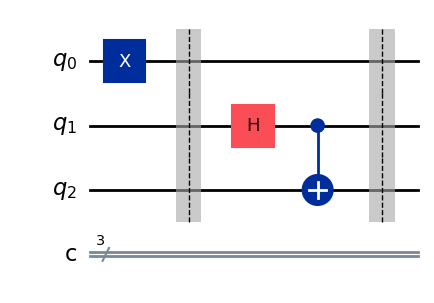

In [ ]:
## Enter code for subtask 1
circuit = QuantumCircuit(3,3)


# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

# ========================
# Step 0: Create the state to be teleported in qubit 0
circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport

circuit.barrier() # just a visual aid
# Entangle the qubits

circuit.h(1) # Apply Hadamard gates

circuit.cx(1,2)# Apply CNOT gate

circuit.barrier() # just a visual aid
circuit.draw("mpl")

**Part - 2 [15 points]**

1. Prepare qₐ in an arbitrary state ∣𝜓⟩ defined by:

  cos($\frac{θ}{2}$)|0>+$e^{iϕ}$sin($\frac{θ}{2}$)|1>

2. Apply the teleportation protocol

  *   Add phase damping noise on qₐ.
  *   Perform a Hadamard gate on qₐ.
  *   Measure qₐ and qᵦ, and record the results.





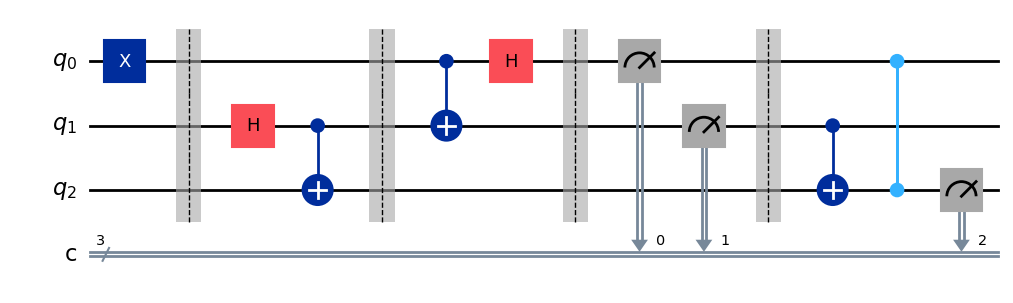

In [ ]:
## Enter code for subtask 2

# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
circuit.cx(0,1)
circuit.h(0)

circuit.barrier() # just a visual aid

# ========================
# Step 3: Alice measures both qubits 0 and 1
circuit.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively

circuit.barrier() # just a visual aid

# ========================
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1.
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
circuit.cx(1, 2)
circuit.cz(0, 2)

# Step 5: Measure Bob's qubit to find out what state it is in
circuit.measure([2], [2])
circuit.draw("mpl")


**Part 3: Correcting for Errors [Optional : No Bonus Points]**

1. Simulate an error channel:

  *   Introduce a depolarizing noise on qᵧ after the Bell state creation.
  *   Use Qiskit's noise model to simulate this corruption.


2. Using the classical results from the measurements of
𝑞ₐ and 𝑞ᵦ, apply the appropriate corrections (Pauli
𝑋 and/or Z gates) to 𝑞ᵧ.


In [ ]:
## Enter code for subtask 3

**Part 4: Verification [5 points]**


1. Compare the final state of
𝑞ᵧ with the original state ∣𝜓⟩
  *   Visualize the Bloch sphere representation of
𝑞ₐ​(original state) and 𝑞ᵧ (teleported state).



{'110': 256, '101': 267, '100': 256, '111': 245}
{'101': 238, '100': 245, '110': 279, '111': 262}


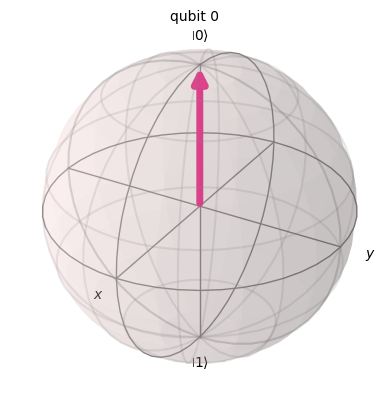

In [ ]:
## Enter code for subtask 4
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Get the statevector of the initial state (q0)
backend = AerSimulator()
job = backend.run(circuit)
result = job.result()
counts = result.get_counts()
print(counts)
# Assuming q0 is the initial state and q2 is the teleported state (Bob's qubit)
initial_statevector = Statevector.from_label('0')  # Statevector from initial state
q0 = initial_statevector.data[0]

# Get statevector of the teleported state (q2)
# Need to simulate the circuit with measurement to get the final state
backend = AerSimulator()
job = backend.run(circuit)
result = job.result()
counts = result.get_counts()
print(counts)

# Get the final statevector from the simulation results
# Here, we assume the most frequent measurement outcome corresponds to the teleported state
# need to adjust this based on your specific teleportation protocol
most_frequent_outcome = max(counts, key=counts.get)
teleported_statevector = Statevector.from_label(most_frequent_outcome)  # Statevector from measurement outcome

# Access the statevector data for q2 (Bob's qubit)

q2 = teleported_statevector.data[2]

# Plot the Bloch vectors
plot_bloch_multivector([q0,q2]) # Plot statevectors of initial and teleported states

### Bonus Points

**[5 Points]**

Perform transpilation and show the transpiled circuit for each sub-task

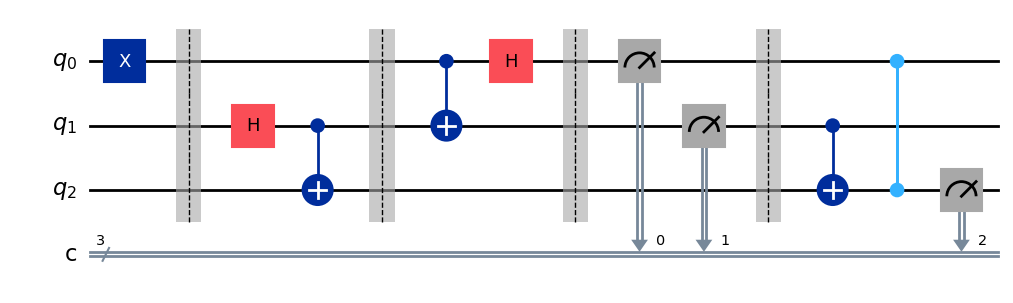

In [ ]:
pm_lv3 = generate_preset_pass_manager(backend=backend, optimization_level=3)

tr_lv3 = pm_lv3.run(qc)

# uncomment to draw circuit
tr_lv3.draw('mpl', idle_wires=False, fold=60)

pm_lv3 = generate_preset_pass_manager(backend=backend, optimization_level=3)

tr_lv3 = pm_lv3.run(circuit)

# uncomment to draw circuit
tr_lv3.draw('mpl', idle_wires=False, fold=60)

## Resources

1. [IBM Quantum Documentation](https://docs.quantum.ibm.com/)
2. [Coding with Qiskit 1.0 Series](https://youtube.com/playlist?list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&si=CTwatqhFWd2hRXbq)
3. [IBM Quantum Challenge 2024 solutions](https://github.com/qiskit-community/ibm-quantum-challenge-2024/tree/main/solutions)